**Classifying the experience levels for gym members**

In [34]:
#Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn. metrics import accuracy_score,confusion_matrix


In [2]:
#Loading the dataset

df = pd.read_csv('C:/Users/USER/Downloads/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [3]:
#Checking the shape of the data

df.shape

(973, 15)

There are 973 rows and 15 columns in our dataset 

In [4]:
#Checking the info of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
# Describing the dataset

df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [6]:
# Checking for null values

df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

No null values

In [7]:
#Checking for duplicates

df.duplicated().sum()

0

No duplicate values

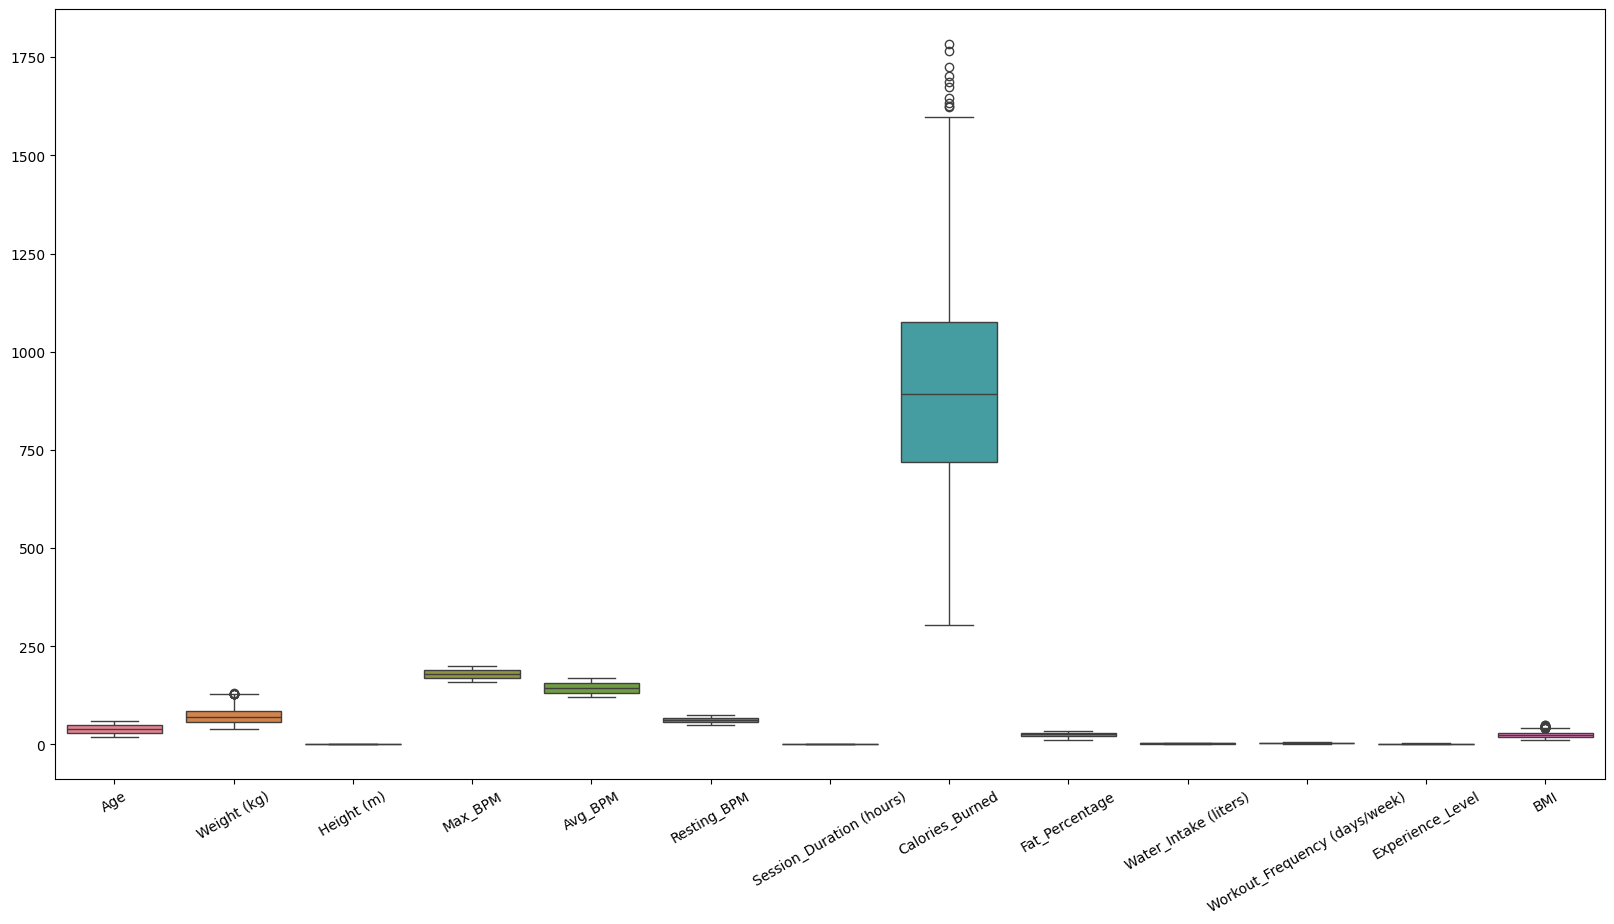

In [8]:
#Checking for outliers

plt.figure(figsize = (20,10))
sns.boxplot(df)
plt.xticks(rotation = 30)
plt.show()

Weight,BMI,and Calories burned columns have outliers that need to be removed. 

In [9]:
#Removing the outliers (IQR Method)

cols = df[['Weight (kg)','Calories_Burned','BMI']]

for i in cols:
    
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    
    cleaned_df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]
    
print(len(cleaned_df))

948


The cleaned dataframe now has 948 rows

In [10]:
#Label Encoding the categorical columns

df.dtypes


Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
dtype: object

We have gender and work-out type as categorical columns that need to be encoded to a language that out machine learning model understands

In [11]:
#Changing the datatypes of the two columns


label_encoder = LabelEncoder()

df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])
df['Workout_Type_Encoded'] = label_encoder.fit_transform(df['Workout_Type'])

df.dtypes

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Session_Duration (hours)         float64
Calories_Burned                  float64
Workout_Type                      object
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                   int64
BMI                              float64
Gender_Encoded                     int32
Workout_Type_Encoded               int32
dtype: object

The two columns have been transformed to integers

In [12]:
#Checking the unique values assigned to the columns


x = df['Gender'].unique()
y = df['Workout_Type'].unique()

category_x = {category: i for i, category in enumerate(x)}
category_y = {category: i for i, category in enumerate(y)}

print(category_x)
print('\n', category_y)

{'Male': 0, 'Female': 1}

 {'Yoga': 0, 'HIIT': 1, 'Cardio': 2, 'Strength': 3}


In [13]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,1,3
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0,1
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,0,0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1,2
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1,2


### Visualizations

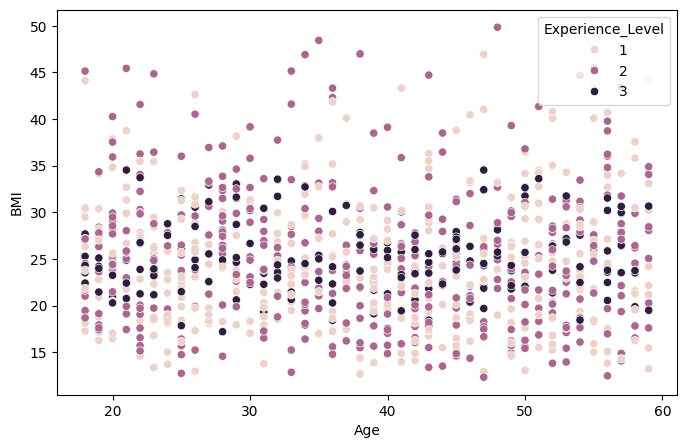

In [14]:
#Scatter plot

plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Age'], y = df['BMI'], hue = df['Experience_Level'])
plt.show()

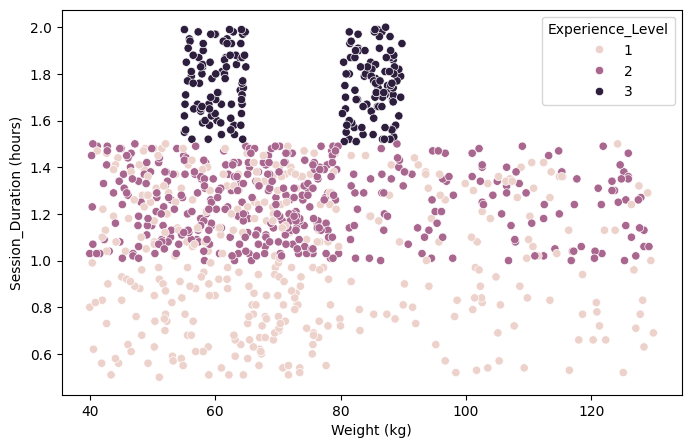

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Weight (kg)'], y = df['Session_Duration (hours)'], hue = df['Experience_Level'])
plt.show()

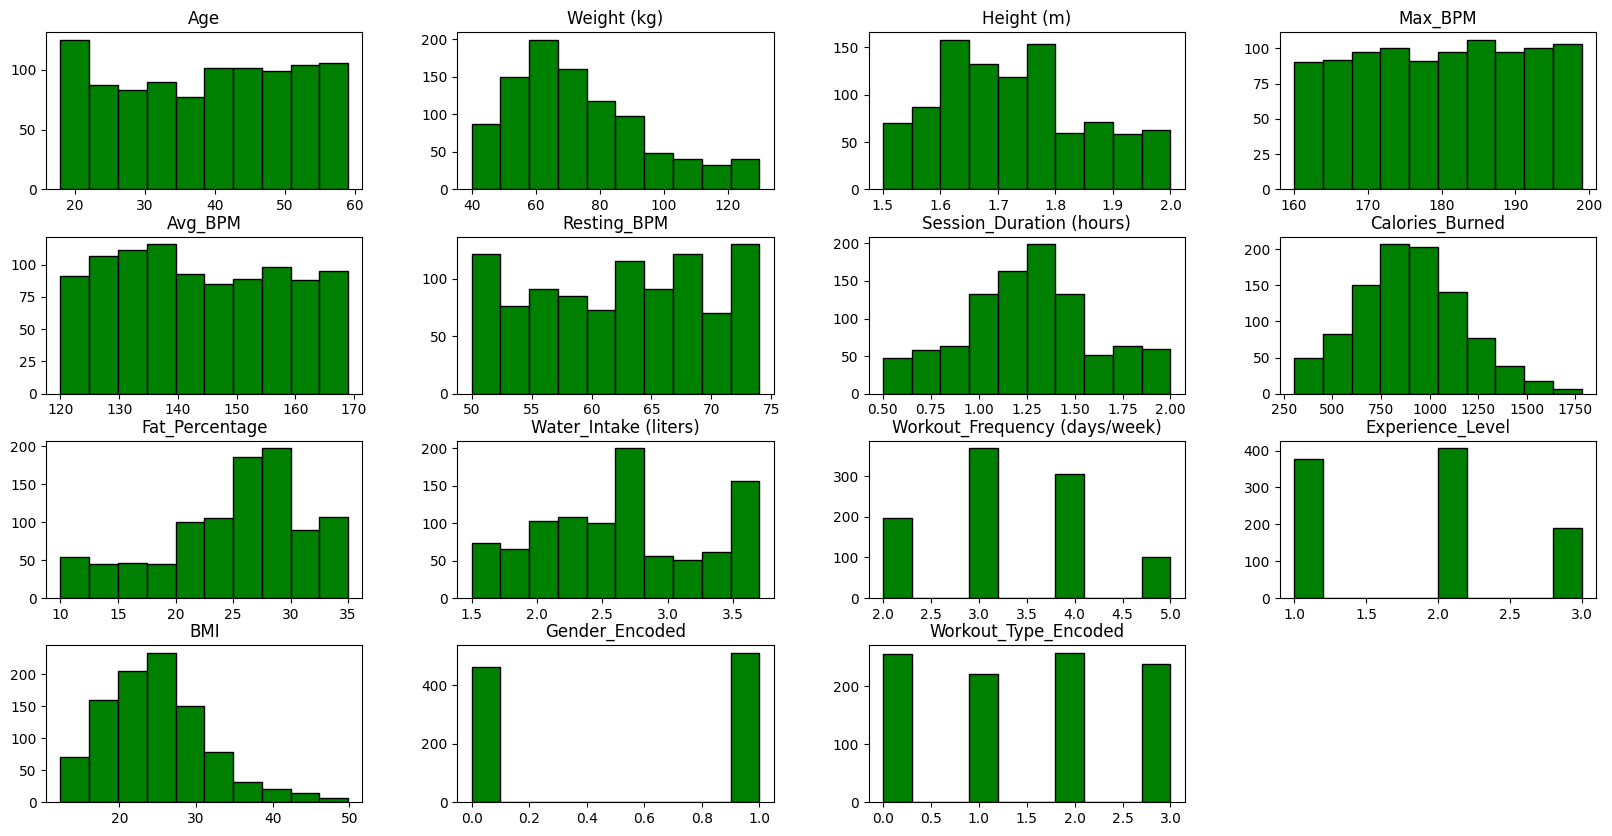

In [16]:
plt.rcParams['figure.figsize'] = (20,10)
df.hist(grid=False, edgecolor = 'black', color = 'green')
plt.show()

In [17]:
#Correlation matrix

#Dropping the Gender and Workout type columns

df.drop(columns=df[['Workout_Type', 'Gender']], axis= 1, inplace= True)


matrix = df.corr()
matrix

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Encoded,Workout_Type_Encoded
Age,1.000000,-0.036340,-0.027837,-0.017073,0.035969,0.004354,-0.019912,-0.154679,0.002370,0.041528,0.008055,-0.018676,-0.013691,0.027175,0.044296
Weight (kg),-0.036340,1.000000,0.365321,0.057061,0.009717,-0.032138,-0.013666,0.095443,-0.225512,0.394276,-0.011769,0.003379,0.853158,0.579340,-0.028724
Height (m),-0.027837,0.365321,1.000000,-0.017660,-0.014776,-0.005090,-0.010206,0.086348,-0.235521,0.393533,-0.011270,-0.010267,-0.159469,0.583503,0.037712
Max_BPM,-0.017073,0.057061,-0.017660,1.000000,-0.039751,0.036647,0.010051,0.002090,-0.009056,0.031621,-0.029099,0.000545,0.067105,0.010245,0.010061
Avg_BPM,0.035969,0.009717,-0.014776,-0.039751,1.000000,0.059636,0.016014,0.339659,-0.007302,-0.002911,-0.010681,-0.000888,0.021605,0.009648,-0.008206
Resting_BPM,0.004354,-0.032138,-0.005090,0.036647,0.059636,1.000000,-0.016649,0.016518,-0.016834,0.007726,-0.007967,0.001758,-0.032543,0.014062,-0.011013
Session_Duration (hours),-0.019912,-0.013666,-0.010206,0.010051,0.016014,-0.016649,1.000000,0.908140,-0.581520,0.283411,0.644140,0.764768,-0.006493,-0.012200,0.035443
Calories_Burned,-0.154679,0.095443,0.086348,0.002090,0.339659,0.016518,0.908140,1.000000,-0.597615,0.356931,0.576150,0.694129,0.059761,0.150646,0.018859
Fat_Percentage,0.002370,-0.225512,-0.235521,-0.009056,-0.007302,-0.016834,-0.581520,-0.597615,1.000000,-0.588683,-0.537060,-0.654363,-0.119258,-0.407309,-0.031913
Water_Intake (liters),0.041528,0.394276,0.393533,0.031621,-0.002911,0.007726,0.283411,0.356931,-0.588683,1.000000,0.238563,0.304104,0.213697,0.667658,0.004411


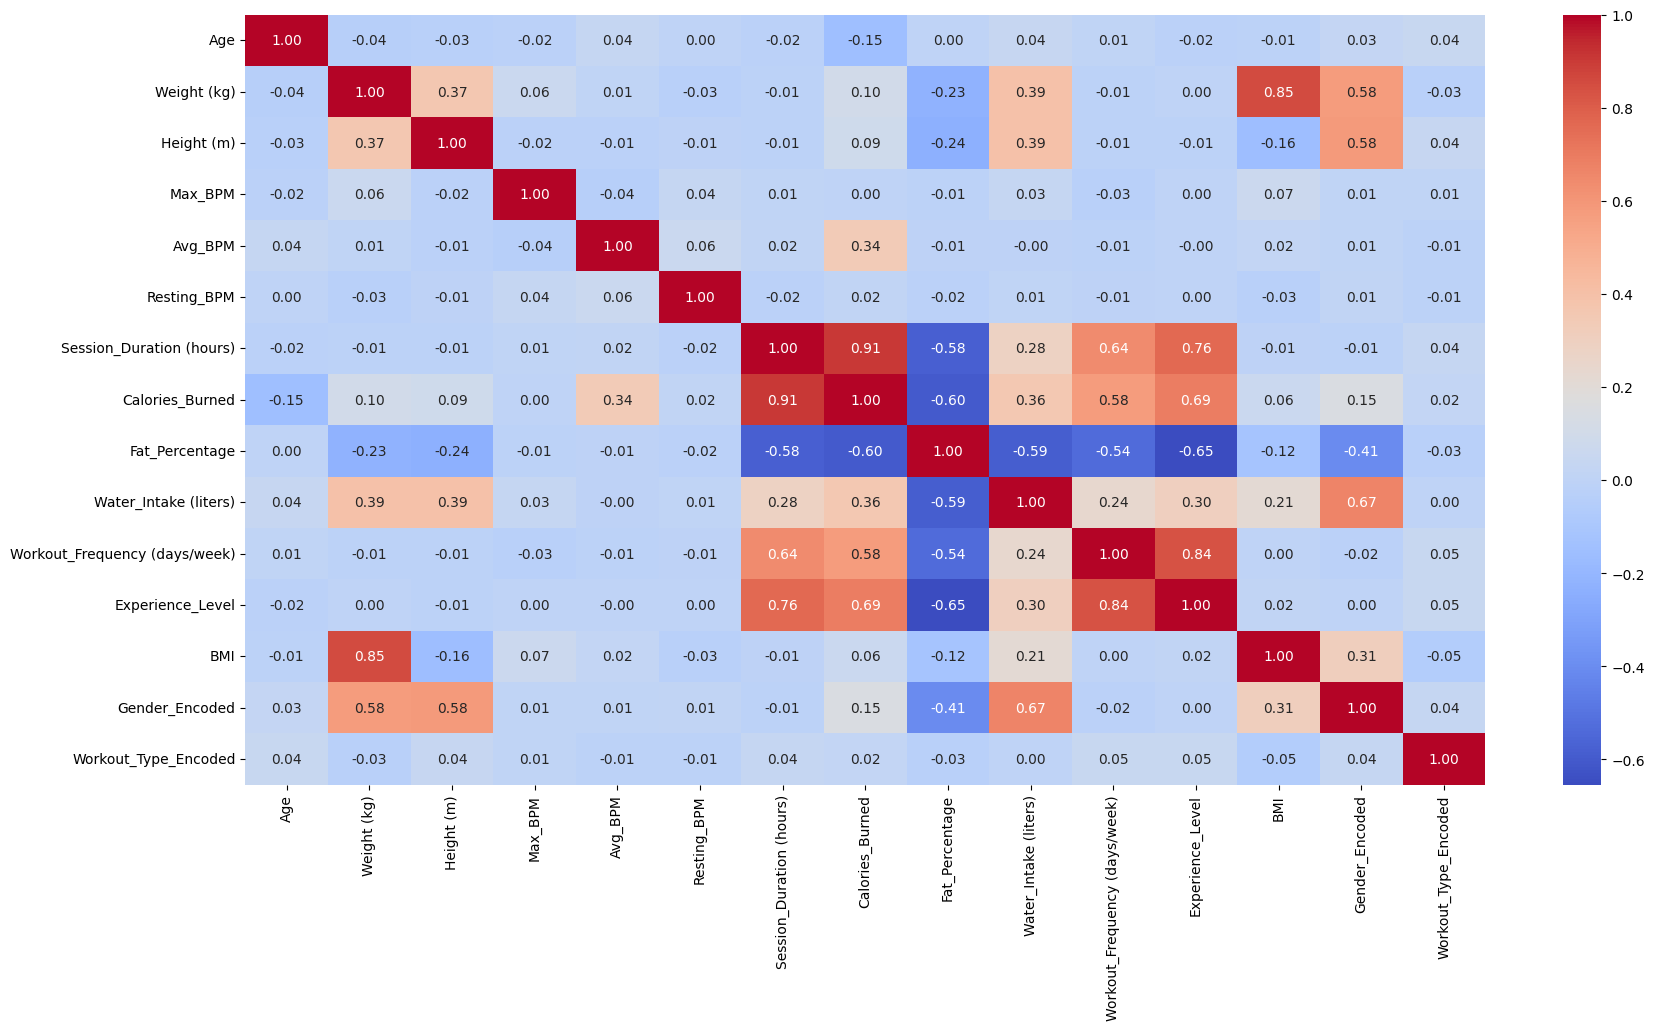

In [18]:
#Heatmap

sns.heatmap(matrix, cmap = 'coolwarm', annot=True, fmt = '.2f')
plt.show()

Workout frequency and session duration are seen to positively influence the experience level of the gym members more than the other variables

### Feature Engineering

In [19]:
X = df.drop(columns='Experience_Level')
y = df['Experience_Level']


In [20]:
#Splitting 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


### Random Forest Classifier Model

In [33]:
#Getting the model

model = RandomForestClassifier()

#Fitting the model

model.fit(X_train, y_train)

#Getting predictions

y_predict = model.predict(X_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print("The accuracy of the Random Forest Classifier model is ", round(accuracy, 2))

#Getting the confusion matrix
matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix: \n', matrix)

score = cross_val_score(model,X_train, y_train,cv = 5, n_jobs=-1).mean()
print("\n The cross validation score of the Gradient Boosting model is ", round(score, 2))

The accuracy of the Random Forest Classifier model is  0.91

Confusion Matrix: 
 [[65  4  0]
 [13 71  0]
 [ 0  0 42]]

 The cross validation score of the Gradient Boosting model is  0.89


### K- Nearest Neighbor Classifier Model

In [22]:
#Getting the model

model = KNeighborsClassifier(n_neighbors=9, p = 3, metric='euclidean')

#Fitting the model

model.fit(X_train, y_train)

#Getting predictions

y_predict = model.predict(X_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print("The accuracy of the KNN model is ", round(accuracy, 2))

#Getting the confusion matrix
matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix: \n', matrix)

score = cross_val_score(model,X_train, y_train,cv = 5, n_jobs=-1).mean()
print("\n The cross validation score of the Gradient Boosting model is ", round(score, 2))

The accuracy of the KNN model is  0.7

Confusion Matrix: 
 [[42 15  1]
 [34 57  4]
 [ 2  3 37]]

 The cross validation score of the Gradient Boosting model is  0.72


### Support Vector Machine Model

In [23]:
#Getting the model

model = SVC(random_state=42)

#Fitting the model

model.fit(X_train, y_train)

#Getting predictions

y_predict = model.predict(X_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print("The accuracy of the Support Vector Machine model is ", round(accuracy, 2))

#Getting the confusion matrix
matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix: \n', matrix)

score = cross_val_score(model,X_train, y_train,cv = 5, n_jobs=-1).mean()
print("\n The cross validation score of the Gradient Boosting model is ", round(score, 2))

The accuracy of the Support Vector Machine model is  0.66

Confusion Matrix: 
 [[36 10  0]
 [39 60  9]
 [ 3  5 33]]

 The cross validation score of the Gradient Boosting model is  0.69


Since the accuracy is a bit low, let's tune it.

In [24]:
#Improving the model by optimizing the parameters with cross validation and GridSearchCV

param_grid = [
    {'C' : [0.5,1,10,100],
     'gamma' : ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel' : ['rbf']},
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=0
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


These are the ideal parameters 

In [25]:
#Getting the model

model = SVC(random_state=42, C = 100, gamma= 0.0001, kernel='rbf')

#Fitting the model

model.fit(X_train, y_train)

#Getting predictions

y_predict = model.predict(X_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print("The accuracy of the Support Vector Machine model is ", round(accuracy, 2))

#Getting the confusion matrix
matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix: \n', matrix)

score = cross_val_score(model,X_train, y_train,cv = 5, n_jobs=-1).mean()
print("\n The cross validation score of the Gradient Boosting model is ", round(score, 2))

The accuracy of the Support Vector Machine model is  0.82

Confusion Matrix: 
 [[60 17  0]
 [18 58  0]
 [ 0  0 42]]

 The cross validation score of the Gradient Boosting model is  0.78


The model's accuracy has significantly improved to 0.82.


### Gradient Boosting Model

In [26]:
model = GradientBoostingClassifier()

#Fitting the model

model.fit(X_train, y_train)

#Getting predictions

y_predict = model.predict(X_test)

#Checking the accuracy of the model

accuracy = accuracy_score(y_predict, y_test)
print("The accuracy of the Gradient Boosting model is ", round(accuracy, 2))

#Getting the confusion matrix
matrix = confusion_matrix(y_predict, y_test)
print('\nConfusion Matrix: \n', matrix)

score = cross_val_score(model,X_train, y_train,cv = 5, n_jobs=-1).mean()
print("\n The cross validation score of the Gradient Boosting model is ", round(score, 2))

The accuracy of the Gradient Boosting model is  0.91

Confusion Matrix: 
 [[67  7  0]
 [11 68  0]
 [ 0  0 42]]

 The cross validation score of the Gradient Boosting model is  0.88


### Conclusion

- From the four models developed, we can note that the models that performed best were the Random Forest Classifier and Gradient Boosting models, which had an accuracy score of 0.9 and 0.91 respectively. The support vector machine also did well, although after tuning it to some parameters, making it improve from 0.66 to 0.82 in terms of its accuracy score. The least performing model was the KNN Model, which had an accuracy of 0.7, probably due to the large number of features used. 
- Also, I have included the cross validation score to help us understand overfitting in the models. Given the closeness between the accuracy scores and cross-validation scores (differences of between 0.1 and 0.4), the model can be said to be stable and reliable to perform predictions as needed.
- For us to know the experience level of a gym member, the two best performing models can be used to help us predict, accurately, the category where the individual can be classified. 